In [85]:
import os, skimage.io, matplotlib.pyplot as plt, numpy as np
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import random

In [86]:
folderName = "MNIST fashion dataset"
labelNames = ["T-shirt/top",
              "Trouser",
              "Pullover",
              "Dress",
              "Coat",
              "Sandal",
              "Shirt",
              "Sneaker",
              "Bag",
              "Ankle boot"]
#these directly correspond to the folders names 0-9
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
        if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        print("loading:",labelNames[int(d)],"from",label_directory)
        file_names = [os.path.join(label_directory, f)for f in os.listdir(label_directory)]
    
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
#             labels.append(labelNames[int(d)])
        
    return images, labels

In [87]:
train_data_path = os.path.join(os.getcwd(),folderName,"training")
images, labels = load_data(train_data_path)

loading: Sandal from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/training/5
loading: Bag from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/training/8
loading: T-shirt/top from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/training/0
loading: Coat from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/training/4
loading: Sneaker from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/training/7
loading: Pullover from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/training/2
loading: Trouser from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/training/1
loading: Dress from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/training/3
loading: Ankl

In [88]:
test_data_path = os.path.join(os.getcwd(),folderName,"testing")
test_images, test_labels = load_data(test_data_path)

loading: Sandal from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/testing/5
loading: Bag from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/testing/8
loading: T-shirt/top from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/testing/0
loading: Coat from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/testing/4
loading: Sneaker from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/testing/7
loading: Pullover from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/testing/2
loading: Trouser from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/testing/1
loading: Dress from /home/josh/uni/2018/2ndSemester/machine-learning/machine-learning-a2/MNIST fashion dataset/testing/3
loading: Ankle boot f

In [89]:
#now we are converting them to numpy arrays
images = np.asarray(images)
test_images = np.asarray(test_images)
labels = np.asarray(labels)
test_labels = np.asarray(test_labels)

#and then we splitting them up into train and validation
train_images,validation_images,train_labels,validation_labels = train_test_split(
    images,
    labels, 
    train_size=0.9, 
    test_size=0.1,
    random_state=0)

In [90]:
print(train_images.shape,
      train_labels.shape,
      validation_images.shape,
      validation_labels.shape,
      test_images.shape,
      test_labels.shape
     )

(54000, 28, 28) (54000,) (6000, 28, 28) (6000,) (10000, 28, 28) (10000,)


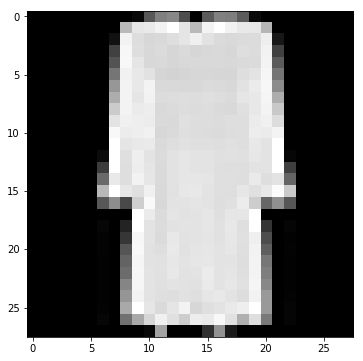

 ^ This is: 3  ^ 


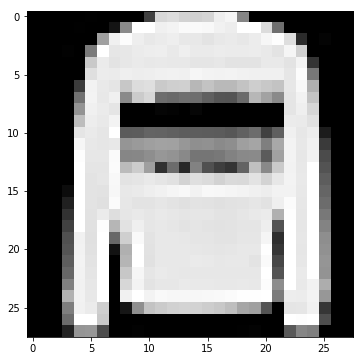

 ^ This is: 2  ^ 


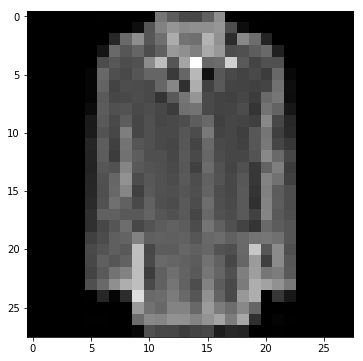

 ^ This is: 4  ^ 


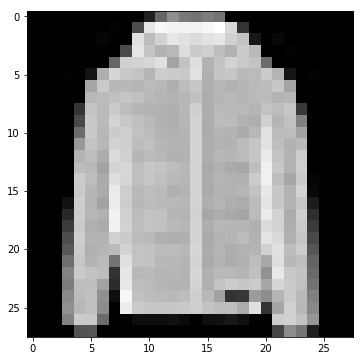

 ^ This is: 4  ^ 


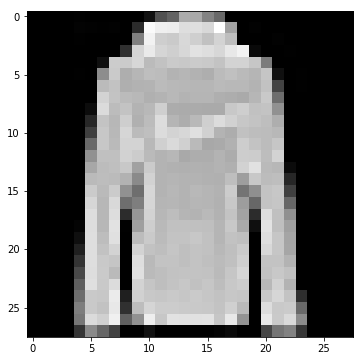

 ^ This is: 2  ^ 


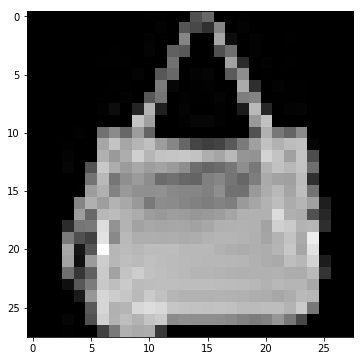

 ^ This is: 8  ^ 


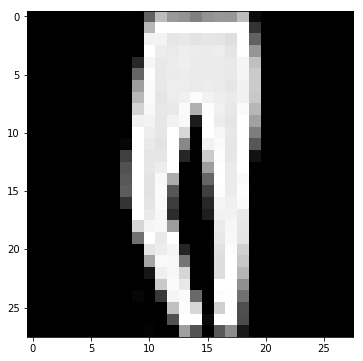

 ^ This is: 1  ^ 


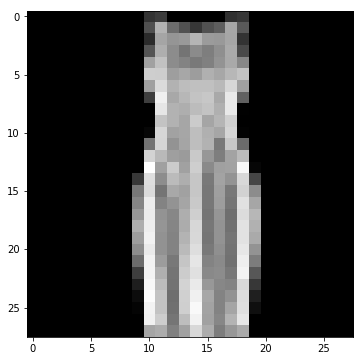

 ^ This is: 3  ^ 


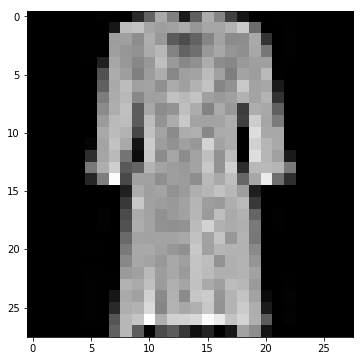

 ^ This is: 3  ^ 


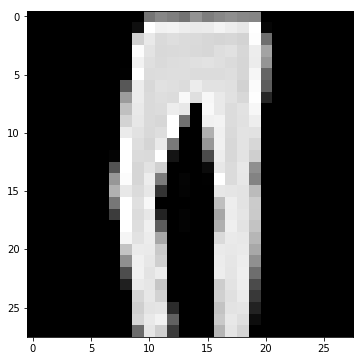

 ^ This is: 1  ^ 


In [91]:
#now quickly testing the right labels are applied
for i in range(0,10):
    plt.plot()
    randImg = random.randint(0,test_images.shape[0])
    plt.imshow(train_images[randImg], cmap=plt.get_cmap('gray'))
    plt.show()
    print(" ^ This is:",train_labels[randImg]," ^ ")


In [92]:
#now reformatting the images a single dimension arrays of pixels
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0],num_pixels).astype('float32')
validation_images = validation_images.reshape(validation_images.shape[0],num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

In [93]:
train_images = train_images/255
validation_images = validation_images/255
test_images = test_images/255

In [94]:
#now we need to convert these labels to something that can be read

# tried encoding the image string label
# trainle = preprocessing.LabelEncoder()
# trainle.fit(train_labels)
# print(trainle.transform(train_labels))

# validationle = preprocessing.LabelEncoder()
# validationle.fit(validation_labels)
# print(validationle.transform(validation_labels))

# testle = preprocessing.LabelEncoder()
# testle.fit(test_labels)
# print(testle.transform(test_labels))

# train_labels = np_utils.to_categorical(trainle.transform(train_labels))
# validation_labels = np_utils.to_categorical(validationle.transform(validation_labels))
# test_labels = np_utils.to_categorical(testle.transform(test_labels))

train_labels = np_utils.to_categorical(train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)

num_classes = train_labels.shape[1]

#becasue this doesnt work

In [140]:
model = Sequential()
model.add(Dense(350, input_dim=num_pixels, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 117us/step - loss: 0.5125 - acc: 0.8187 - val_loss: 0.4656 - val_acc: 0.8367
Epoch 2/5
54000/54000 [==============================] - 6s 113us/step - loss: 0.3899 - acc: 0.8581 - val_loss: 0.3757 - val_acc: 0.8653
Epoch 3/5
54000/54000 [==============================] - 6s 114us/step - loss: 0.3509 - acc: 0.8725 - val_loss: 0.3595 - val_acc: 0.8640
Epoch 4/5
54000/54000 [==============================] - 6s 114us/step - loss: 0.3242 - acc: 0.8813 - val_loss: 0.3486 - val_acc: 0.8697
Epoch 5/5
54000/54000 [==============================] - 6s 113us/step - loss: 0.3025 - acc: 0.8887 - val_loss: 0.3469 - val_acc: 0.8748


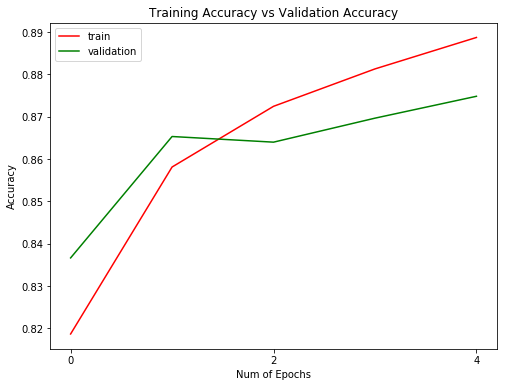

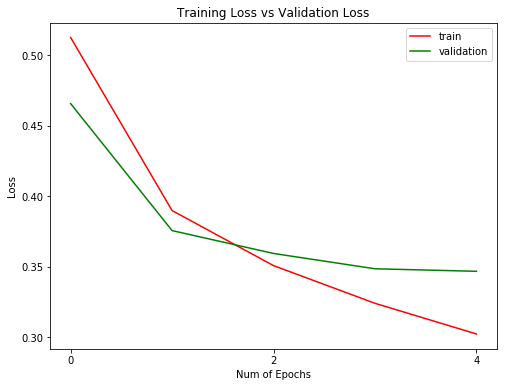

In [141]:
history = model.fit(
    train_images,
    train_labels,
    validation_data=(
        validation_images,
        validation_labels
    ),
    epochs=5
)

training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']

training_error = history.history['loss']
validation_error = history.history['val_loss']

plt.figure(0)
plt.plot(training_accuracy,'r')
plt.plot(validation_accuracy,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(training_error,'r')
plt.plot(validation_error,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()


In [142]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 13.35%
MLP Accuracy on test set: 86.65%


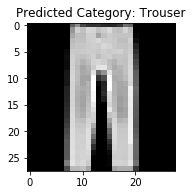

In [131]:
image_index = random.randint(0,test_images.shape[0])
random_image = test_images[image_index]
random_label = model.predict(random_image.reshape(1,random_image.shape[0])).argmax(axis=-1)

plt.subplot(221)
plt.imshow(random_image.reshape(28,28), cmap=plt.get_cmap('gray'))

plt.title("Predicted Category: "+labelNames[random_label[0]])
plt.show()